In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import zipfile

We first extract out the dataset.zip file into our filespace

In [ ]:
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('')

Setting up of Hyper Parameters to be used for training


*   **batch_size:** Determines the number of images the model gets to view when training. Though this number is a tunable parameter 32 is usually a good number. 
*   **img_height and img_width:** Note that if you look at the code below the numbers are lower than the actual pixel dimensions of the image. This size reduction is intentional as it speeds up training
*   **seed_num:** Used to fix the random nature of the model to get reproducable results.
*   **validation_split:** ratio of the number of images used for validation in proporportion to the total number of images
*   **data_dir:** Directory of the folder containing images.


*  **epochs:** Represents the number of steps used in training









In [ ]:
batch_size = 32 
img_height = 100
img_width = 30
seed_num=123
validation_split=0.2
data_dir='dataset'
epochs=10

We will be training our model with supervised learning. Supervised learning implies that data fed to the model for traning contain labels denoting its right classification. When training a neural network under supervised learning we often split our dataset into a train and validation set. You can think of the training set as being used by the neural network to learn from the data. Then the neural network uses the validation set to test it self. This happens in each step also known as an epoch. 


Creating the training dataset

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="training",
  seed=seed_num,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 436 files belonging to 7 classes.
Using 349 files for training.


Creating the validation dataset

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="validation",
  seed=seed_num,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 436 files belonging to 7 classes.
Using 87 files for validation.


Printing of class names. If you can created the subfolders correctly in part 1 of the lab it should appear in order from 0 to 6.  

In [ ]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6']


We now take a peak of a few images and their labels contained within our training dataset. Note the intentional reduction in image quality.

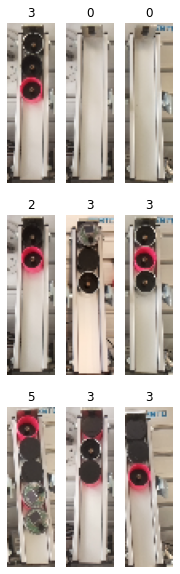

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Each batch in the training dataset has 32 images and labels

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 30, 3)
(32,)


training and validation datasets are prefecthed to speed up training.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Creation of the convolutional neural network to be used for image classification

In [ ]:
num_classes = len(class_names)

model = keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Setting up of training procedures and metrics

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 100, 30, 3)        0         
                                                                 
 conv2d (Conv2D)             (None, 100, 30, 16)       448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 15, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 7, 32)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 7, 64)         1

Training of the convolutional neural network. Note the increase in accuracy and val_accuracy as well as the decrease in loss and val_loss.

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
11/11 [==============================] - 11s 79ms/step - loss: 1.8997 - accuracy: 0.1891 - val_loss: 1.8296 - val_accuracy: 0.3678
Epoch 2/10
11/11 [==============================] - 0s 11ms/step - loss: 1.6065 - accuracy: 0.4069 - val_loss: 1.1702 - val_accuracy: 0.6092
Epoch 3/10
11/11 [==============================] - 0s 11ms/step - loss: 0.7425 - accuracy: 0.8424 - val_loss: 0.3405 - val_accuracy: 0.9425
Epoch 4/10
11/11 [==============================] - 0s 11ms/step - loss: 0.2696 - accuracy: 0.9226 - val_loss: 0.1780 - val_accuracy: 0.9310
Epoch 5/10
11/11 [==============================] - 0s 11ms/step - loss: 0.1557 - accuracy: 0.9484 - val_loss: 0.0801 - val_accuracy: 0.9655
Epoch 6/10
11/11 [==============================] - 0s 12ms/step - loss: 0.1672 - accuracy: 0.9570 - val_loss: 0.0921 - val_accuracy: 0.9770
Epoch 7/10
11/11 [==============================] - 0s 12ms/step - loss: 0.1002 - accuracy: 0.9685 - val_loss: 0.0557 - val_accuracy: 0.9770
Epoch 8/10
1

**Graphing the training of the model.**

The platueing of both the accuracy and loss graphs implies that further epochs (steps) in training will lead to unsubstaincial gain in performance. Moreover in the later epochs the training accuracy is higher than the validation accuracy. A similar trend is shown as the training loss is lower than the validation loss. This ratio between the metrics of traning and validation gives us a sense of whether our model is under or over fitting to our training dataset. 

When the training metrics far exceed in performance to the validation metrics it implies over fitting onto our training dataset. This means that our model only works well with our training dataset. When exposed to new images in the validation dataset it under performes. This can take place when we use a high value for our epochs.    

In contrast when training metrics is subsided in comparison to the validation metrics it implies underfitting to our training dataset. This means our model fails at learning the patterns contained within the dataset. Resolving this could involve changing the hyper parameters of the model and/or the training procedure. 

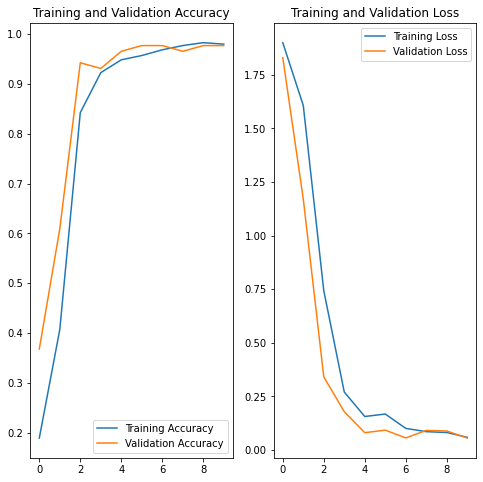

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Finally we convert our trained model to a lite version. You can think of this as compressing our trained model. This reduces space requirements and increases the speed of the model for which resource contrained devices such as the Raspberry Pi can greatly benefit from.

Makesure to download the 'model.tflite' from files to be used with the Raspberry pi.

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpfxxh_4w_/assets
